# Microscope simulation tutorial


Welcome to the microscope simulation tutorial. In this tutorial we will show the basics of the simulated microscope

In [1]:
import numpy as np
import set_path
from openwfs.simulation import Microscope, StaticSource, Camera
from openwfs.plot_utilities import grab_and_show
import astropy.units as u
import matplotlib.pyplot as plt

Let's start by showing how a simple image source works. TODO: needs fixing!

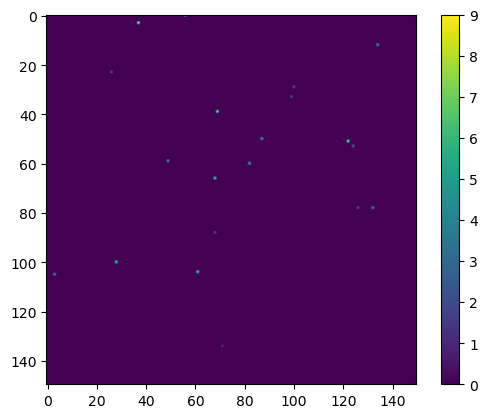

In [2]:
img_size_x = 150
# Determines how wide the image is.

img_size_y = 150
# Determines how high the image is.

img = np.maximum(np.random.randint(-10000, 10, (img_size_y, img_size_x), dtype=np.int16), 0)
src = StaticSource(img, pixel_size = 50 * u.nm)

plt.imshow(img)
plt.colorbar()

We now have an object that functions like a camera: when it is triggered and read, it produces an image

We can imagine them as fluorescent beads in a medium

Let's now make a microscope:

In [3]:
### Parameters that can be altered


magnification = 40
# magnification from object plane to camera.

numerical_aperture = 0.85
# numerical aperture of the microscope objective

wavelength = 532.8 * u.nm
# wavelength of the light, different wavelengths are possible, units can be adjusted accordingly.

pixel_size = 6.45 * u.um / np.sqrt(40)
# Size of the pixels on the camera

camera_resolution = (256, 256)
# number of pixels on the camera

p_limit = 10
# Number of iterations. Influences how quick the 'animation' is complete.

## Code

mic = Microscope(
    src,
    magnification=magnification,
    numerical_aperture=numerical_aperture,
    wavelength=wavelength)


cam = Camera(
    mic,
    analog_max=None,
    shot_noise=True,
    digital_max=255,
)



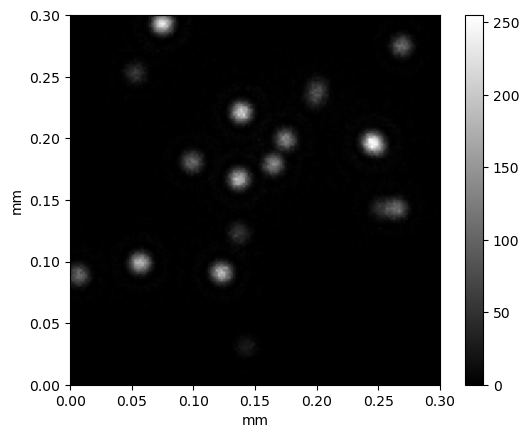

<Axes: xlabel='mm', ylabel='mm'>

In [4]:
grab_and_show(cam)

Now lets see what happens when we add an abberation of an angled wavefront to the pupil plane:

In [5]:
def make_angled_wavefront(size, slope_x, slope_y):
    # Create a meshgrid of coordinates
    x, y = np.meshgrid(np.linspace(-np.pi, np.pi, size), np.linspace(-np.pi, np.pi, size))

    # Create the square array with specified slopes
    array = (slope_y * y + slope_x * x)

    return array


aberration = make_angled_wavefront(img_size_y, 0, 0), pixel_size=50 * u.nm)

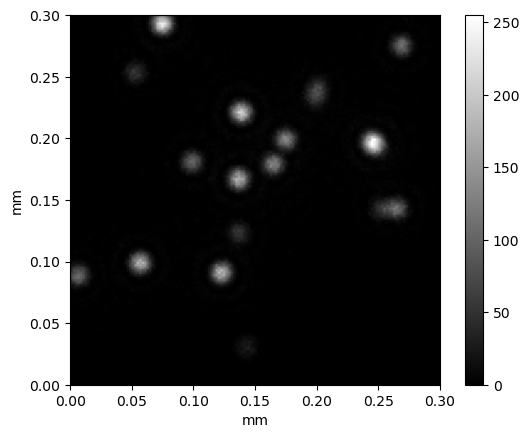

<Axes: xlabel='mm', ylabel='mm'>

In [28]:
mic.aberrations = StaticSource(make_angled_wavefront(img_size_y * 1, 6, 1), extent=2 * numerical_aperture)
grab_and_show(cam)

Indeed, the image shifts a little. Adding stronger angled wavefront will result in some reflections, but has the same effect

Adding a diffusive random speckle in the pupil plane, the image will get significantly worse:

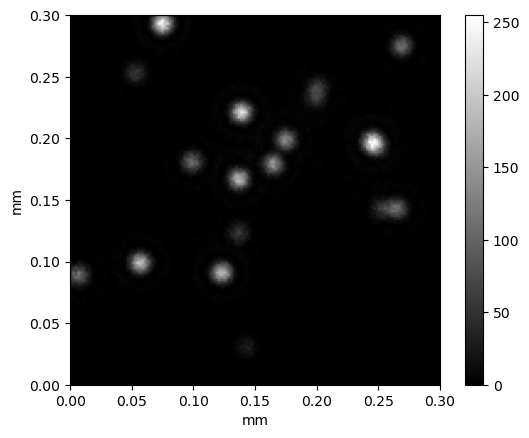

<Axes: xlabel='mm', ylabel='mm'>

In [14]:
im = np.random.rand(img_size_y, img_size_x) * 2 * np.pi * 3.0j

mic.aberrations = StaticSource(im, pixel_size=50 * u.nm)
grab_and_show(cam)